In [60]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='whitegrid', palette='bright')

In [61]:
data = pd.read_csv("./2020_Problem_D_DATA/fullevents.csv")
Events = data.groupby(["EventType", "EventSubType"]).size()
output = pd.DataFrame(Events)
output.to_csv("events.csv", index=True)
data.info()
data[data['EventType'] == 'Offside']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59271 entries, 0 to 59270
Data columns (total 12 columns):
MatchID                59271 non-null int64
TeamID                 59271 non-null object
OriginPlayerID         59271 non-null object
DestinationPlayerID    23644 non-null object
MatchPeriod            59271 non-null object
EventTime              59271 non-null float64
EventType              59271 non-null object
EventSubType           59131 non-null object
EventOrigin_x          59056 non-null float64
EventOrigin_y          59056 non-null float64
EventDestination_x     59047 non-null float64
EventDestination_y     59047 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 5.4+ MB


,MatchID,TeamID,OriginPlayerID,DestinationPlayerID,MatchPeriod,EventTime,EventType,EventSubType,EventOrigin_x,EventOrigin_y,EventDestination_x,EventDestination_y
128,1,Opponent1,Opponent1_D1,NaN,1H,457.039100,Offside,NaN,84.0,12.0,100.0,100.0
247,1,Huskies,Huskies_F3,NaN,1H,892.350866,Offside,NaN,76.0,8.0,0.0,0.0
356,1,Huskies,Huskies_F1,NaN,1H,1250.066342,Offside,NaN,74.0,98.0,0.0,0.0
692,1,Opponent1,Opponent1_D4,NaN,1H,2612.054635,Offside,NaN,88.0,45.0,100.0,100.0
734,1,Opponent1,Opponent1_D1,NaN,1H,2810.221212,Offside,NaN,89.0,17.0,100.0,100.0
1234,1,Opponent1,Opponent1_F4,NaN,2H,1768.919395,Offside,NaN,97.0,54.0,100.0,100.0
1273,1,Opponent1,Opponent1_F4,NaN,2H,1962.991516,Offside,NaN,89.0,30.0,100.0,100.0
1352,1,Opponent1,Opponent1_F4,NaN,2H,2260.051279,Offside,NaN,66.0,69.0,100.0,100.0
1661,2,Huskies,Huskies_F1,NaN,1H,567.459018,Offside,NaN,83.0,91.0,100.0,100.0
1919,2,Huskies,Huskies_F1,NaN,1H,1475.836110,Offside,NaN,62.0,26.0,100.0,100.0


In [62]:
Players = pd.DataFrame(data.groupby(["OriginPlayerID"]))[0]
MyPlayers = Players[Players.str.contains("Huskies") == True].tolist()
PlayersDict = {
    "Huskies_G1": 0,
    "Huskies_D1": 1,
    "Huskies_D2": 2,
    "Huskies_D3": 3,
    "Huskies_D4": 4,
    "Huskies_D5": 5,
    "Huskies_D6": 6,
    "Huskies_D7": 7,
    "Huskies_D8": 8,
    "Huskies_D9": 9,
    "Huskies_D10": 10,
    "Huskies_M1": 11,
    "Huskies_M2": 12,
    "Huskies_M3": 13,
    "Huskies_M4": 14,
    "Huskies_M5": 15,
    "Huskies_M6": 16,
    "Huskies_M7": 17,
    "Huskies_M8": 18,
    "Huskies_M9": 19,
    "Huskies_M10": 20,
    "Huskies_M11": 21,
    "Huskies_M12": 22,
    "Huskies_M13": 23,
    "Huskies_F1": 24,
    "Huskies_F2": 25,
    "Huskies_F3": 26,
    "Huskies_F4": 27,
    "Huskies_F5": 28,
    "Huskies_F6": 29,
}
EventTypeList = pd.DataFrame(data.groupby(["EventType"]))[0].tolist()
EventSubTypeList = pd.DataFrame(data.groupby(["EventSubType"]))[0].tolist()
EventSubTypeList.append("Offside")

In [63]:
PlayerData = pd.DataFrame(index=PlayersDict.keys(), columns=EventSubTypeList, data=0)
N = data.shape[0]
for i in range(0,N):
    if (data['TeamID'][i] == 'Huskies'):
        try:
            PlayerData[data['EventSubType'][i]][PlayersDict[data['OriginPlayerID'][i]]] += 1
        except:
            data['EventSubType'][i] = 'Offside'
            PlayerData[data['EventSubType'][i]][PlayersDict[data['OriginPlayerID'][i]]] += 1
PlayerData

,Acceleration,Air duel,Ball out of the field,Clearance,Corner,Cross,Foul,Free Kick,Free kick cross,Free kick shot,...,Simple pass,Simulation,Smart pass,Substitution,Throw in,Time lost foul,Touch,Violent Foul,Whistle,Offside
Huskies_G1,0,27,0,17,0,0,1,116,1,0,...,160,0,0,0,0,0,63,0,0,0
Huskies_D1,3,274,0,108,0,6,19,9,0,0,...,768,0,4,2,4,0,138,0,0,4
Huskies_D2,0,117,0,103,0,1,23,12,6,0,...,518,0,1,3,0,0,61,0,0,3
Huskies_D3,3,142,0,102,0,5,8,23,6,0,...,639,0,3,2,5,0,67,0,0,0
Huskies_D4,7,37,0,35,20,47,8,8,14,2,...,594,0,10,2,167,0,51,0,0,1
Huskies_D5,8,74,0,72,0,52,27,5,2,0,...,574,0,7,1,209,0,84,0,0,1
Huskies_D6,3,90,0,52,0,17,11,3,0,0,...,295,0,1,0,52,0,45,0,0,1
Huskies_D7,6,85,0,57,0,48,16,7,4,0,...,373,0,4,0,200,0,67,0,0,0
Huskies_D8,23,32,0,12,0,30,3,0,0,0,...,252,0,5,1,127,0,55,0,0,0
Huskies_D9,1,7,0,5,0,0,1,0,0,0,...,56,0,0,1,2,0,3,0,0,0


In [64]:
colormap = plt.cm.viridis
plt.figure(figsize=(24,22))
# sns.heatmap(PlayerData, linewidths=0.1, vmax=100, cmap=colormap, linecolor='white', annot=True, square=True)

<Figure size 1728x1584 with 0 Axes>

<Figure size 1728x1584 with 0 Axes>

<Figure size 2160x1584 with 0 Axes>

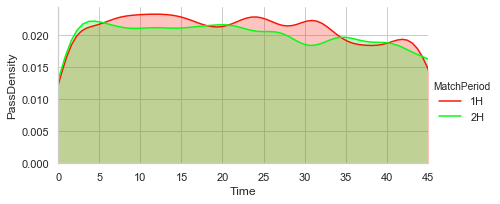

In [65]:
# pass Density
TimeData = data[data["EventType"] == "Pass"][["MatchPeriod", "EventTime", "EventType"]]
TimeData["EventTime"] /= 60.0

plt.figure(figsize=(30, 22))
facet = sns.FacetGrid(TimeData, hue="MatchPeriod", aspect=2, palette=sns.hls_palette(3, l=.5, s=.95))
facet.map(sns.kdeplot, "EventTime", shade=True)
facet.set(xlim=(0, 45))
facet.add_legend()
facet.set_axis_labels("Time", "PassDensity")


In [66]:
Pos = {}
for i in data[data['MatchID'] == 11][data['MatchPeriod'] == '1H'].index:
    if (data['TeamID'][i] != 'Huskies'):
        continue
    if (data["EventType"][i] == 'Substitution'):
        continue
    if (data["EventOrigin_x"][i] == float('nan') or data["EventOrigin_y"][i] == float('nan')):
        continue
    if (data["OriginPlayerID"][i] != ''):
        if (data["OriginPlayerID"][i] not in Pos.keys()):
            Pos[data["OriginPlayerID"][i]] = [
                [
                    float(data["EventOrigin_x"][i]),
                    float(data["EventOrigin_y"][i]),
                    data["MatchPeriod"][i],
                    data["EventTime"][i],
                ]
            ]
        else:
            Pos[data["OriginPlayerID"][i]].append(
                [
                    float(data["EventOrigin_x"][i]),
                    float(data["EventOrigin_y"][i]),
                    data["MatchPeriod"][i],
                    data["EventTime"][i],
                ]
            )
    if (data["EventDestination_x"][i] == float('nan') or data["EventDestination_y"][i] == float('nan')):
        continue
    if (data["DestinationPlayerID"][i] != ''):
        if (data["DestinationPlayerID"][i] not in Pos.keys()):
            Pos[data["DestinationPlayerID"][i]] = [
                [
                    float(data["EventDestination_x"][i]),
                    float(data["EventDestination_y"][i]),
                    data["MatchPeriod"][i],
                    data["EventTime"][i],
                ]
            ]
        else:
            Pos[data["DestinationPlayerID"][i]].append(
                [
                    float(data["EventDestination_x"][i]),
                    float(data["EventDestination_y"][i]),
                    data["MatchPeriod"][i],
                    data["EventTime"][i],
                ]
            )

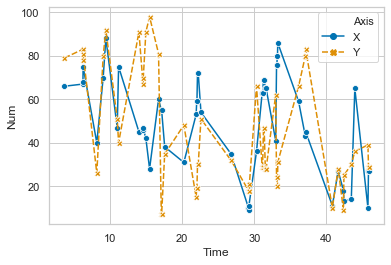

In [67]:
Pos['Huskies_M1'].sort(key=lambda x:x[3], reverse=False)
lM1 = len(Pos['Huskies_M1'])
M1_data = pd.DataFrame(index=range(lM1*2) ,columns=['Num', 'Axis', 'Time'])
for i in range(lM1):
    #if (i>0 and i<lM1-1 and (Pos['Huskies_M1'][i][3]-Pos['Huskies_M1'][i-1][3]<5 or Pos['Huskies_M1'][i+1][3]-Pos['Huskies_M1'][i][3]<5)):
        #continue
    M1_data['Num'][2*i] = int(Pos['Huskies_M1'][i][0])
    M1_data['Axis'][2*i] = 'X'
    M1_data['Time'][2*i] = float(Pos['Huskies_M1'][i][3] / 60.0)
    M1_data['Num'][2*i+1] = int(Pos['Huskies_M1'][i][1])
    M1_data['Axis'][2*i+1] = 'Y'
    M1_data['Time'][2*i+1] = float(Pos['Huskies_M1'][i][3] / 60.0)
M1_data
sns.lineplot(x=M1_data['Time'].astype('float'), y=M1_data['Num'].astype('int'), hue=M1_data['Axis'], markers=True, style=M1_data['Axis'], palette='colorblind')

In [68]:
PlayersAvgPos = {}
XAvg = {}
YAvg = {}
HalfTime = 2700.0
for i in Pos.keys():
    Pos[i].sort(key=lambda x: (x[2], x[3]), reverse=False)
    posNum = len(Pos[i])
    XAvg[i] = 0.0
    YAvg[i] = 0.0
    if (posNum == 1):
        XAvg[i] = Pos[i][0][0]
        YAvg[i] = Pos[i][0][1]
        continue
    for j in range(0, posNum, 1):
        if (j == 0):
            XAvg[i] += Pos[i][j][0] * Pos[i][j][3] + Pos[i][j][0] * (Pos[i][j+1][3] - Pos[i][j][3]) / 2
            YAvg[i] += Pos[i][j][1] * Pos[i][j][3] + Pos[i][j][1] * (Pos[i][j+1][3] - Pos[i][j][3]) / 2
        elif (j == posNum - 1):
            if Pos[i][j][3] <= HalfTime:  # 舍弃补时数据
                XAvg[i] += Pos[i][j][0] * (Pos[i][j][3] - Pos[i][j-1][3]) /2 + Pos[i][j][0] * (HalfTime - Pos[i][j][3])
                YAvg[i] += Pos[i][j][1] * (Pos[i][j][3] - Pos[i][j-1][3]) /2 + Pos[i][j][1] * (HalfTime - Pos[i][j][3])
        else:
            XAvg[i] += Pos[i][j][0] * (Pos[i][j+1][3] - Pos[i][j-1][3]) / 2
            YAvg[i] += Pos[i][j][1] * (Pos[i][j+1][3] - Pos[i][j-1][3]) / 2
    XAvg[i] /= HalfTime
    YAvg[i] /= HalfTime

In [69]:
AvgPos = pd.DataFrame(index=PlayersDict.keys(), columns=['XAvg', 'YAvg', 'Role'])
for i in XAvg.keys():
    if (i != float('nan')):
        AvgPos['XAvg'][i] = XAvg[i]
        AvgPos['YAvg'][i] = YAvg[i]
for i in AvgPos.index:
    AvgPos['Role'][i] = str(i)[8]
AvgPos
# XAvg, YAvg

,XAvg,YAvg,Role
Huskies_G1,NaN,NaN,G
Huskies_D1,NaN,NaN,D
Huskies_D2,NaN,NaN,D
Huskies_D3,NaN,NaN,D
Huskies_D4,NaN,NaN,D
Huskies_D5,NaN,NaN,D
Huskies_D6,NaN,NaN,D
Huskies_D7,NaN,NaN,D
Huskies_D8,NaN,NaN,D
Huskies_D9,NaN,NaN,D


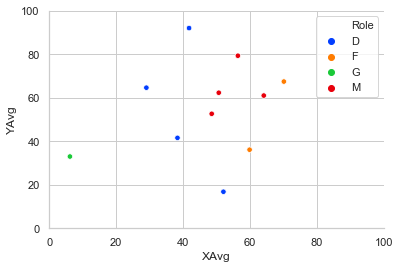

In [70]:
# plt.figure(figsize=(10,10))
# flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
sns.set_palette(sns.color_palette("bright"))
sns.scatterplot(x='XAvg', y='YAvg', hue='Role', data=AvgPos, s=30)
plt.xlim(0,100)
plt.ylim(0,100)
sns.despine() # 去掉多余的线

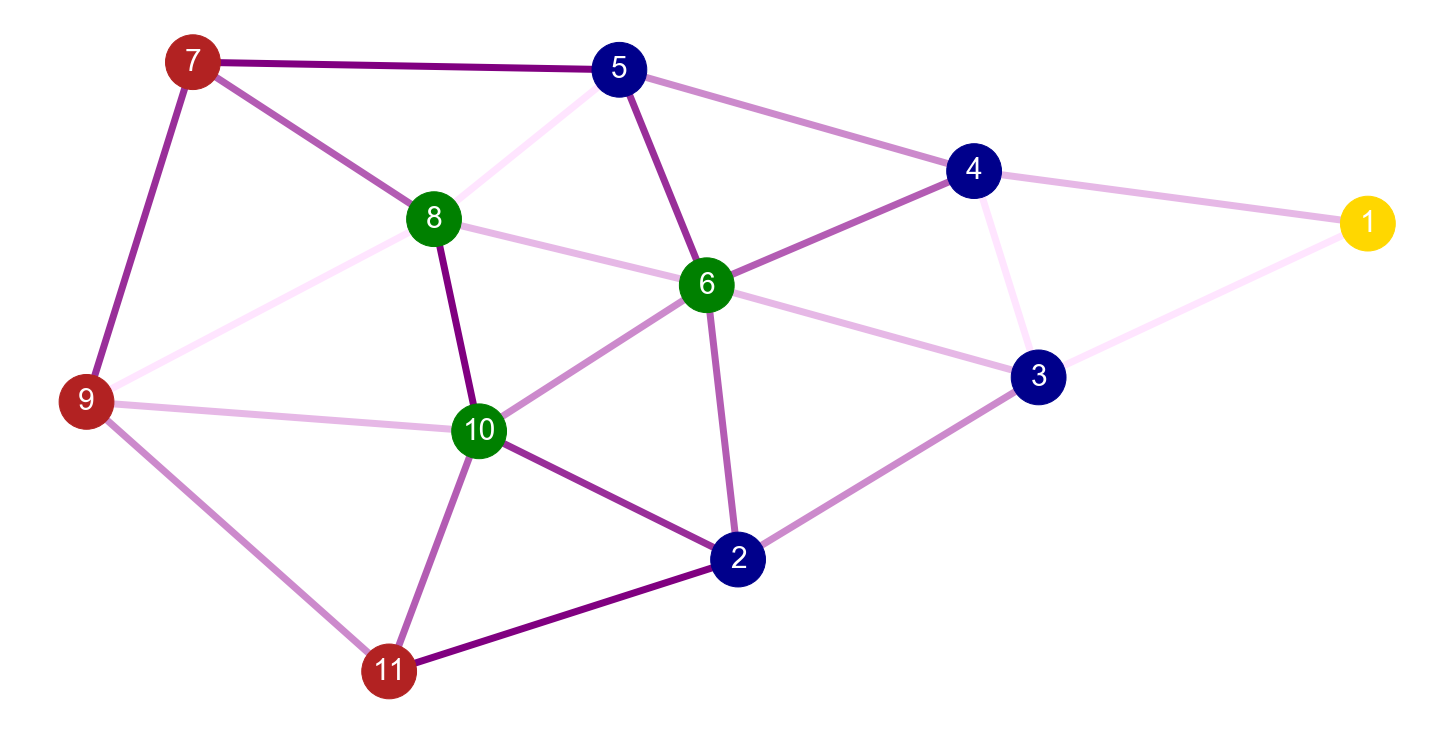

In [71]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from([1,2,3,4,5,6,7,8,9,10,11])
addList = [(1,3,4), (1,4,4),
           (2,3,6), (3,4,8), (4,5,6),
           (6,2,5), (6,3,5), (6,4,9), (6,5,9), (6,8,10), (6,10,10),
           (2,10,4), (2,11,6), (5,7,4), (5,8,6),
           (8,10,8), (8,7,4), (8,9,2), (10,11,4), (10,9,2),
           (7,9,3), (11,9,3)]
Nedge = len(addList)
nodecolor=['gold','darkblue','darkblue','darkblue','darkblue','green','firebrick','green','firebrick','green','firebrick']
edgecolor=[]
for i in range(Nedge):
    G.add_edge(addList[i][0],addList[i][1],weight=addList[i][2])
    # G.add_edge(addList[i][1],addList[i][0],weight=addList[i][2])
    # edgecolor.append(50.0/addList[i][2])
    edgecolor.append(50.0/addList[i][2])
plt.figure(figsize=(20,10))
sns.set_palette(sns.light_palette("purple"))
sns.set_style('white')
nx.draw(G, with_labels=True, node_size=3000, node_color=nodecolor, font_color='white',font_size=30, width=7, edge_color=sns.light_palette("purple"))